# Root Mean Squared Logarithmic Error

##### This is the evaluation metric for the July 2021 Tabular Playground Challenge on Kaggle.

The root mean squared logarithmic error (RMSLE) is a variation of the well-known MSE used when the predictions have large deviation; with this metric, predictions that are very far from the mean have a weight closer to those near the mean than with the MSE.

The RMSLE of a column of observations is calculated as follows:

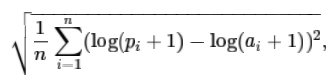

where <b>*n*</b> is the total number of observations, <b>*$p_{i}$*</b> is  prediction *i*, <b>*$a_{i}$*</b> is the actual value of *i*, <b>*log(x)*</b> is the natural logarithm of *x* (source: Kaggle; URL: https://www.kaggle.com/c/tabular-playground-series-jul-2021/overview/evaluation).

In this notebook, I define a function that calculates the RMSLE of an array-like object. Then, I use the function to calculate the RMSLE of a sample_submission on Kaggle, and I compare the results with those obtained with the mean_squared_error metric from sklearn. 

In [1]:
import pandas as pd
import numpy as np
import math               # this is required to calculate the natural log
from numpy import random  #I use this to make random predicitons

## Function definition

In [2]:
def calculate_RMSLE(predictions, measurements):

#    predicitons is an array-like object with the predicitons (pi in the above equation)
#    
#    measurements is an array-like object with the target values (ai in the above equation)
    
    sum_=0
    
    for i in range(len(predictions)):
        
        sum_ += (math.log(predictions[i] + 1) - math.log(measurements[i] + 1))**2  #this corresponds to the summation part
                                                                                   #in the above equation
    RMSLE = math.sqrt((1/len(predictions)) * sum_)    #note that len(predictions) corresponds to n in the above equation
    
    return RMSLE

## Prepare "predictions" and "measurements" arrays

In [3]:
#these dataset were downloaded for the Tabular Playground Series (July 2021) on Kaggle (https://www.kaggle.com/c/tabular-playground-series-jul-2021/data)
train=pd.read_csv('train.csv')
sample_submission=pd.read_csv('sample_submission.csv')

In [4]:
train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [5]:
train.shape

(7111, 12)

In [7]:
sample_submission.head()

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,2.0,10.0,300.0
1,2011-01-01 01:00:00,2.0,10.0,300.0
2,2011-01-01 02:00:00,2.0,10.0,300.0
3,2011-01-01 03:00:00,2.0,10.0,300.0
4,2011-01-01 04:00:00,2.0,10.0,300.0


In [8]:
#For the purposes of this notebook, only the target values (not the feautes) are necessary
#Also, I reduce the number of observaitons (to 1000) to speed up the calculations

sample_train=train[['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']]
sample_train=sample_train.iloc[0:1000,:]
sample_train.head()

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,2.5,12.0,167.7
1,2010-03-10 19:00:00,2.1,9.9,98.9
2,2010-03-10 20:00:00,2.2,9.2,127.1
3,2010-03-10 21:00:00,2.2,9.7,177.2
4,2010-03-10 22:00:00,1.5,6.4,121.8


In [9]:
sample_train.describe()

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
count,1000.000000,1000.000000,1000.000000
mean,2.155900,9.404600,133.457000
std,1.350907,7.058877,83.068072
min,0.300000,0.100000,11.400000
25%,1.100000,3.900000,71.850000
50%,1.800000,7.900000,116.600000
75%,2.800000,13.200000,176.400000
max,8.300000,41.600000,568.000000


Now, I will make random predicitons for the three target variables in sample_train using the function random.uniform(); I limit the value of the predictions to 500

In [23]:
random_predictions_dict={}
for i in sample_submission.columns:

    if i != 'date_time':   

        random_predictions_dict[i]=[random.uniform(0, 500) for x in range(len(sample_train))]

random_predictions=pd.DataFrame(random_predictions_dict)
random_predictions.head()

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,208.476530,47.976413,296.758713
1,127.606378,188.521477,233.225711
2,201.557407,160.740496,173.390531
3,127.843661,162.312749,154.454621
4,231.393206,109.594920,207.243086


## Calculate the RMSLE of the prepared arrays

In [24]:
carbon_monoxide_pred=random_predictions['target_carbon_monoxide']
carbon_monoxide_measurement=sample_train['target_carbon_monoxide']

benzene_pred=random_predictions['target_benzene']
benzene_measurement=sample_train['target_benzene']

nitrogen_oxide_pred=random_predictions['target_nitrogen_oxides']
nitrogen_oxide_measurement=sample_train['target_nitrogen_oxides']

In [25]:
RMSLE_CM=calculate_RMSLE(carbon_monoxide_pred, carbon_monoxide_measurement)

RMSLE_BZ=calculate_RMSLE(benzene_pred, benzene_measurement)

RMSLE_NO=calculate_RMSLE(nitrogen_oxide_pred, nitrogen_oxide_measurement)

In [26]:
RMSLE_CM

4.31840256281496

In [27]:
RMSLE_BZ

3.3472023044443118

In [28]:
RMSLE_NO

1.295143563255917

## Compare results with those of sklearn metric 

In [29]:
from sklearn.metrics import mean_squared_log_error

In [30]:
RMSLE_CM_=math.sqrt(mean_squared_log_error(carbon_monoxide_measurement, carbon_monoxide_pred))
RMSLE_BZ_=math.sqrt(mean_squared_log_error(benzene_measurement, benzene_pred))
RMSLE_NO_=math.sqrt(mean_squared_log_error(nitrogen_oxide_measurement, nitrogen_oxide_pred))

In [31]:
RMSLE_CM_

4.3184025628149625

In [32]:
RMSLE_BZ_

3.3472023044443113

In [33]:
RMSLE_NO_

1.2951435632559163

In [34]:
print(round(RMSLE_CM, 13)==round(RMSLE_CM_, 13), round(RMSLE_BZ, 13)==round(RMSLE_BZ_, 13), round(RMSLE_NO, 13)==round(RMSLE_NO_, 13))

True True True


## Conclusion

Based on a comparison with an Sklearn metric, the funciton defined in this notebook can calculate the RMSLE of an array of observations with precision up to 13 decimal places.